In [3]:
import numpy as np
import pandas as pd 
import pickle as pkl
from statsmodels.stats.multitest import multipletests
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

# recessive

In [4]:
def fdr(regenie, pheno_num): 
    
    regenie["P"] = 10**(-regenie[f"LOG10P.Y{pheno_num}"])
    regenie["-log P"] = -(np.log10(regenie["P"])) 
    regenie["FDR"] = multipletests(regenie["P"], method="fdr_bh", alpha=0.1)[0]


In [25]:
geno = pd.read_csv("../icurl/libd_updated//pr/pr_min_hom_merged.raw", sep=" ")

In [38]:
power_results = []
for s in [1, 2,3]:
    print(s)
    for p in [10, 50, 100, 200, 500]:

        true = pkl.load(open(f"../simulations/pr_phenotype_simulations/input/redo/simulated_pheno_size{p}_clique_size{s}.pkl", "rb"))
        regenie = pd.read_csv(f"../simulations/pr_phenotype_simulations/output/simulated_pheno_{p}_clique{s}.regenie", sep=" ")

        for i in range(1, 50):
            fdr(regenie, i)
            if i >= 50:
                continue

            true_dict = true[i - 1]
            true_ids = list(true_dict.values())[0]

            if len(true_ids) >= 1:
                filtered_df = geno[geno["FID"].isin(true_ids)]
                true_cols = [col[:-2] for col in filtered_df.columns[(filtered_df == 2).all()].tolist()]
            else:
                true_cols = []

            regenie["true_status"] = regenie["ID"].isin(true_cols)
            
            total_true = len(regenie[(regenie["true_status"] == True)])
            true_positives = len(regenie[(regenie["true_status"] == True) & (regenie["FDR"] == True)])
            power = true_positives/total_true
            
            power_results.append([s, p, i, power, total_true, true_positives])
#         print(" ")

1
2
3


In [39]:
power = pd.DataFrame(power_results, columns=["number_with_phenotype", "total_cases", "i", "power", "total_true", "true_positives"])

In [40]:
power_avg = power.groupby(["number_with_phenotype", "total_cases"])["power"].mean().reset_index()

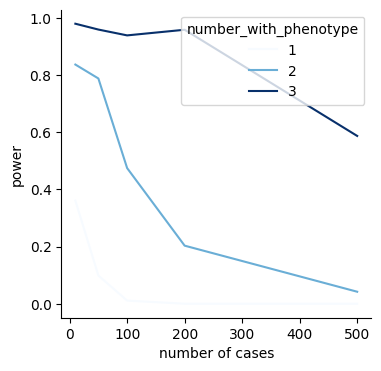

In [45]:
plt.figure(figsize=(4,4))
sns.lineplot(x="total_cases", y="power", hue="number_with_phenotype", data=power_avg, palette="blue")
sns.despine()
plt.xlabel("number of cases")
plt.show()

# dominant 

In [5]:
geno = pd.read_csv("../icurl/libd_updated/pr/pr_21.raw", sep=" ")

In [8]:
power_results = []
for s in [5, 7, 8, 9, 10]:
    for p in [10, 50, 100, 500]:

        true = pkl.load(open(f"../simulations/pr_phenotype_simulations/input/dom/simulated_pheno_size{p}_clique_size{s}_max10.pkl", "rb"))
        
        for i in range(20):
            
            regenie = pd.read_csv(f"../simulations/pr_phenotype_simulations/output/dom/simulated_pheno_{p}_clique_size{s}_max10_{i}.regenie", sep=" ")
            fdr(regenie, 1)

            true_dict = true[i]
            true_ids = list(true_dict.values())[0]

            if len(true_ids) >= 1:
                filtered_df = geno[geno["FID"].isin(true_ids)]
                true_cols = [col[:-2] for col in filtered_df.columns[(filtered_df == 1).all()].tolist()]
            else:
                true_cols = []

            regenie["true_status"] = regenie["ID"].isin(true_cols)
            
            
            total_true = len(regenie[(regenie["true_status"] == True)])
            
            true_positives = len(regenie[(regenie["true_status"] == True) & (regenie["FDR"] == True)])
            power = true_positives/total_true
            print([s, p, i, power, total_true, true_positives])
            power_results.append([s, p, i, power, total_true, true_positives])
#         print(" ")

[5, 10, 0, 0.0, 3, 0]
[5, 10, 1, 1.0, 5, 5]
[5, 10, 2, 0.0, 3, 0]
[5, 10, 3, 1.0, 4, 4]
[5, 10, 4, 0.0, 5, 0]
[5, 10, 5, 0.0, 6, 0]
[5, 10, 6, 1.0, 6, 6]
[5, 10, 7, 0.0, 3, 0]
[5, 10, 8, 1.0, 4, 4]
[5, 10, 9, 0.0, 2, 0]
[5, 10, 10, 0.0, 1, 0]
[5, 10, 11, 0.0, 4, 0]
[5, 10, 12, 0.0, 4, 0]
[5, 10, 13, 1.0, 4, 4]
[5, 10, 14, 1.0, 3, 3]
[5, 10, 15, 1.0, 10, 10]
[5, 10, 16, 1.0, 6, 6]
[5, 10, 17, 0.0, 3, 0]
[5, 10, 18, 1.0, 4, 4]
[5, 10, 19, 0.0, 5, 0]
[5, 50, 0, 0.0, 4, 0]
[5, 50, 1, 0.0, 5, 0]
[5, 50, 2, 0.0, 5, 0]
[5, 50, 3, 0.0, 7, 0]
[5, 50, 4, 0.0, 2, 0]
[5, 50, 5, 0.0, 1, 0]
[5, 50, 6, 0.0, 2, 0]
[5, 50, 7, 0.0, 1, 0]
[5, 50, 8, 0.0, 2, 0]
[5, 50, 9, 1.0, 4, 4]
[5, 50, 10, 0.0, 4, 0]
[5, 50, 11, 0.0, 7, 0]
[5, 50, 12, 0.0, 3, 0]
[5, 50, 13, 0.0, 3, 0]
[5, 50, 14, 0.0, 3, 0]
[5, 50, 15, 0.0, 5, 0]
[5, 50, 16, 0.0, 9, 0]
[5, 50, 17, 0.0, 3, 0]
[5, 50, 18, 0.7857142857142857, 14, 11]
[5, 50, 19, 0.0, 14, 0]
[5, 100, 0, 0.0, 2, 0]
[5, 100, 1, 0.0, 4, 0]
[5, 100, 2, 0.0, 4, 0]
[5, 100, 3,

[10, 50, 13, 1.0, 3, 3]
[10, 50, 14, 1.0, 1, 1]
[10, 50, 15, 1.0, 2, 2]
[10, 50, 16, 1.0, 4, 4]
[10, 50, 17, 1.0, 1, 1]
[10, 50, 18, 1.0, 2, 2]
[10, 50, 19, 1.0, 1, 1]
[10, 100, 0, 1.0, 3, 3]
[10, 100, 1, 1.0, 1, 1]
[10, 100, 2, 1.0, 1, 1]
[10, 100, 3, 1.0, 2, 2]
[10, 100, 4, 1.0, 1, 1]
[10, 100, 5, 1.0, 1, 1]
[10, 100, 6, 1.0, 1, 1]
[10, 100, 7, 1.0, 4, 4]
[10, 100, 8, 0.2, 5, 1]
[10, 100, 9, 1.0, 4, 4]
[10, 100, 10, 1.0, 3, 3]
[10, 100, 11, 1.0, 1, 1]
[10, 100, 12, 1.0, 1, 1]
[10, 100, 13, 1.0, 1, 1]
[10, 100, 14, 1.0, 3, 3]
[10, 100, 15, 1.0, 1, 1]
[10, 100, 16, 1.0, 2, 2]
[10, 100, 17, 1.0, 3, 3]
[10, 100, 18, 1.0, 3, 3]
[10, 100, 19, 1.0, 1, 1]
[10, 500, 0, 1.0, 1, 1]
[10, 500, 1, 1.0, 1, 1]
[10, 500, 2, 0.0, 3, 0]
[10, 500, 3, 0.0, 2, 0]
[10, 500, 4, 1.0, 1, 1]
[10, 500, 5, 1.0, 2, 2]
[10, 500, 6, 1.0, 1, 1]
[10, 500, 7, 1.0, 1, 1]
[10, 500, 8, 1.0, 1, 1]
[10, 500, 9, 0.0, 3, 0]
[10, 500, 10, 1.0, 2, 2]
[10, 500, 11, 0.0, 1, 0]
[10, 500, 12, 0.0, 1, 0]
[10, 500, 13, 1.0, 2, 2]
[1

In [9]:
power = pd.DataFrame(power_results, columns=["number_with_phenotype", "total_cases", "i", "power", "total_true", "true_positives"])

In [20]:
power = power[power["total_cases"] != 50]

In [21]:
power_avg = power.groupby(["number_with_phenotype", "total_cases"])["power"].mean().reset_index()

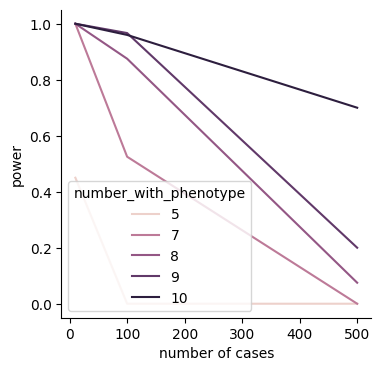

In [22]:
plt.figure(figsize=(4,4))
sns.lineplot(x="total_cases", y="power", hue="number_with_phenotype", data=power_avg)
sns.despine()
plt.xlabel("number of cases")
plt.show()

# rare

In [5]:
geno = pd.read_csv("../rare_variant_gwas/geno/pr/pr_chr21.raw", sep="\t")

In [6]:
bins = [0.0001, 0.001, 0.01, 0.1, 1]
bins

[0.0001, 0.001, 0.01, 0.1, 1]

In [14]:
gcount = pd.read_csv("../rare_variant_gwas/geno/pr/pr_chr21.gcount", sep="\t")
gcount["maf"] = (gcount["TWO_ALT_GENO_CTS"] + (gcount["HET_REF_ALT_CTS"]/2))/(gcount["HET_REF_ALT_CTS"] + gcount["TWO_ALT_GENO_CTS"] + gcount["HOM_REF_CT"] )

In [15]:
gcount_filtered = gcount[gcount["TWO_ALT_GENO_CTS"] == 3]

In [16]:
gcount_filtered

,#CHROM,ID,REF,ALT,PROVISIONAL_REF?,HOM_REF_CT,HET_REF_ALT_CTS,TWO_ALT_GENO_CTS,HAP_REF_CT,HAP_ALT_CTS,MISSING_CT,maf
19,21,21:10414921:G:A,G,A,Y,6979,211,3,0,0,128,0.015084
228,21,21:10602110:T:C,C,T,Y,3810,3506,3,0,0,2,0.239923
365,21,21:14383007:A:G,A,G,Y,7024,145,3,0,0,149,0.010527
533,21,21:15866192:T:C,T,C,Y,7055,214,3,0,0,49,0.015127
572,21,21:17559176:C:T,C,T,Y,7100,210,3,0,0,8,0.014768
...,...,...,...,...,...,...,...,...,...,...,...,...
10483,21,21:46388927:C:CGGCT,C,CGGCT,Y,7136,168,3,0,0,14,0.011906
10709,21,21:46436140:C:T,C,T,Y,6958,359,3,0,0,1,0.024932
10923,21,21:46643474:C:T,C,T,Y,7085,119,3,0,0,114,0.008672
10948,21,21:46651989:C:T,C,T,Y,7049,268,3,0,0,1,0.018716


In [21]:
"21:10414921:G:A" in gcount_filtered["ID"].values

True

In [23]:
power_results = []
bins = [0.0001, 0.001, 0.01, 0.1, 1]

prop_with_pheno = 1 
bin_range=["(0.0001-0.001]", "(0.001-0.01]", "(0.01-0.1]", "(0.1-1]"]
for x in [1, 0.67, 0.33]:
    for m in [0, 1, 2]:
        for p in [10, 50, 100, 500, 1000]:

            true = pkl.load(open(f"../simulations/pr_phenotype_simulations/input/rare/simulated_pheno_size{p}_variant_prop{x}_maf_bin{m}.pkl", "rb"))
            regenie = pd.read_csv(f"../simulations/pr_phenotype_simulations/output/rare/simulated_pheno_size{p}_variant_prop{x}_maf_bin{m}.regenie", sep=" ")
            print(x, m, p)
            for i in range(1, 29):
                fdr(regenie, i)

                if i - 1 in true:
                    true_dict = true[i - 1]
                    true_ids = list(true_dict.values())[0]
                    true_var = list(true_dict.keys())[0][:-2]
                    if true_var in gcount_filtered["ID"].values: 
                        print(true_var)
                        regenie["true_status"] = np.where(regenie["ID"].isin([true_var]), True, False)

                        if len(regenie[regenie["true_status"] == True]):
                            total_true = len(regenie[(regenie["true_status"] == True)])
                            true_positives = len(regenie[(regenie["true_status"] == True) & (regenie["FDR"] == True)])
                            power = true_positives/total_true

                            power_results.append([x, bin_range[m], p, i, power, total_true, true_positives])
            #         print(" ")

1 0 10
1 0 50
1 0 100
1 0 500
1 0 1000
1 1 10
21:46643474:C:T
21:45204455:C:T
21:42525952:T:A
21:45494994:A:G
21:44638117:G:A
21:39228670:C:T
21:39228670:C:T
21:44522177:G:A
21:44290123:G:T
21:44806982:G:A
21:44806982:G:A
21:34073619:G:GT
21:44426769:G:T
21:41479341:T:C
1 1 50
21:46643474:C:T
21:42385602:C:T
21:21385522:G:T
21:33455645:T:G
21:41839901:C:T
21:45509615:C:G
21:34707873:G:A
21:33751967:A:C
21:44426769:G:T
21:36765164:C:T
21:33751967:A:C
21:45494994:A:G
21:44426769:G:T
21:34707873:G:A
21:44579805:C:T
1 1 100
21:45204455:C:T
21:42855627:C:T
21:36211908:C:T
21:44806982:G:A
21:41834430:A:G
21:45204455:C:T
21:39228670:C:T
21:21385522:G:T
21:43094491:C:T
21:42525952:T:A
21:42855627:C:T
21:44364207:G:A
1 1 500
21:36719770:C:T
21:42385602:C:T
21:34073619:G:GT
21:41836275:G:A
21:45509615:C:G
21:44806982:G:A
21:41834430:A:G
21:44638271:G:A
21:30881292:G:A
21:39228670:C:T
21:36765164:C:T
21:44364207:G:A
21:41810065:G:A
21:36719770:C:T
21:41834430:A:G
1 1 1000
21:36719770:C:T
21:44806

In [24]:
power = pd.DataFrame(power_results, columns=["proportion_with_phenotype", "bin_range", "total_cases", "i", "power", "total_true", "true_positives"])

In [25]:
power_avg = power.groupby(["total_cases", "proportion_with_phenotype", "bin_range"])["power"].mean().reset_index()

In [27]:
power_avg

,total_cases,proportion_with_phenotype,bin_range,power
0,10,0.33,(0.001-0.01],0.083333
1,10,0.33,(0.01-0.1],0.200000
2,10,0.67,(0.001-0.01],0.062500
3,10,0.67,(0.01-0.1],0.000000
4,10,1.00,(0.001-0.01],0.071429
5,10,1.00,(0.01-0.1],0.000000
6,50,0.33,(0.001-0.01],0.000000
7,50,0.33,(0.01-0.1],0.000000
8,50,0.67,(0.001-0.01],0.842105
9,50,0.67,(0.01-0.1],0.000000


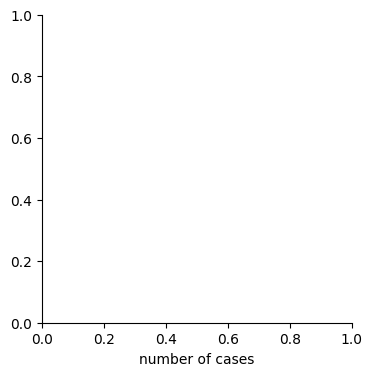

In [26]:
plt.figure(figsize=(4,4))
sns.lineplot(x="total_cases", y="power", hue="proportion_with_phenotype", 
            data=power_avg[power_avg["bin_range"] == "(0.0001-0.001]"])
sns.despine()
plt.xlabel("number of cases")
plt.show()

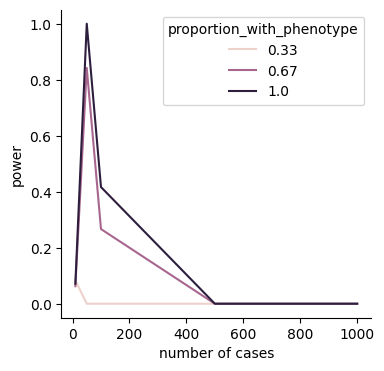

In [28]:
plt.figure(figsize=(4,4))
sns.lineplot(x="total_cases", y="power", hue="proportion_with_phenotype", 
            data=power_avg[power_avg["bin_range"] == "(0.001-0.01]"])
sns.despine()
plt.xlabel("number of cases")
plt.show()

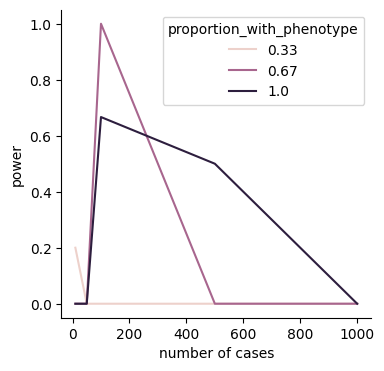

In [29]:
plt.figure(figsize=(4,4))
sns.lineplot(x="total_cases", y="power", hue="proportion_with_phenotype", 
            data=power_avg[power_avg["bin_range"] == "(0.01-0.1]"])
sns.despine()
plt.xlabel("number of cases")
plt.show()

# genpwr

In [156]:
df = pd.read_csv("single-variant-power.csv")

In [157]:
df = df[df["Test.Model"] == "Recessive"]

In [160]:
df

,Unnamed: 0,Test.Model,True.Model,MAF,OR,N_total,N_cases,N_controls,Case.Rate,Power_at_Alpha_0.05
25,12,Recessive,Recessive,0.001,2,8000,80,7920,0.01,0.050007
26,32,Recessive,Recessive,0.011,2,8000,80,7920,0.01,0.050837
27,51,Recessive,Recessive,0.021,2,8000,80,7920,0.01,0.053054
28,71,Recessive,Recessive,0.031,2,8000,80,7920,0.01,0.056662
29,91,Recessive,Recessive,0.041,2,8000,80,7920,0.01,0.061667
...,...,...,...,...,...,...,...,...,...,...
345,4113,Recessive,Recessive,0.001,100,8000,1600,6400,0.20,0.052557
346,4313,Recessive,Recessive,0.011,100,8000,1600,6400,0.20,0.375541
347,4513,Recessive,Recessive,0.021,100,8000,1600,6400,0.20,0.880156
348,4713,Recessive,Recessive,0.031,100,8000,1600,6400,0.20,0.996206


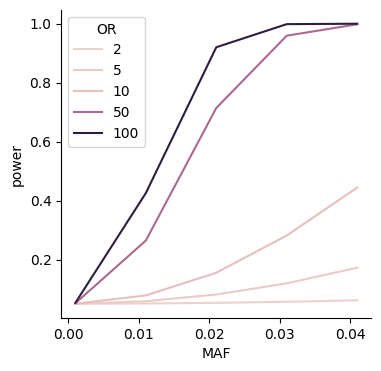

In [164]:
plt.figure(figsize=(4,4))
sns.lineplot(x="MAF", y="Power_at_Alpha_0.05", hue="OR", 
            data=df[df["Case.Rate"] == 0.01])
sns.despine()
plt.xlabel("MAF")
plt.ylabel("power")
plt.show()

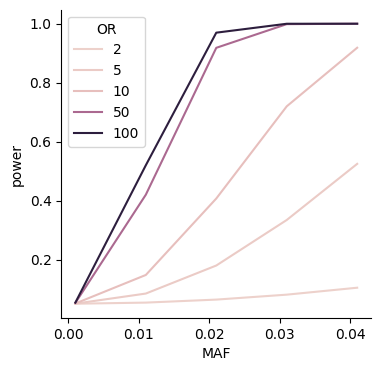

In [165]:
plt.figure(figsize=(4,4))
sns.lineplot(x="MAF", y="Power_at_Alpha_0.05", hue="OR", 
            data=df[df["Case.Rate"] == 0.05])
sns.despine()
plt.xlabel("MAF")
plt.ylabel("power")
plt.show()

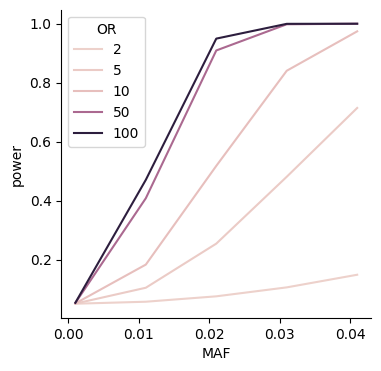

In [166]:
plt.figure(figsize=(4,4))
sns.lineplot(x="MAF", y="Power_at_Alpha_0.05", hue="OR", 
            data=df[df["Case.Rate"] == 0.1])
sns.despine()
plt.xlabel("MAF")
plt.ylabel("power")
plt.show()

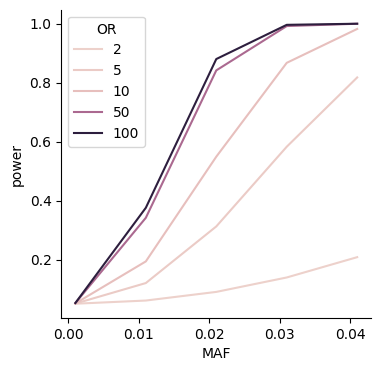

In [167]:
plt.figure(figsize=(4,4))
sns.lineplot(x="MAF", y="Power_at_Alpha_0.05", hue="OR", 
            data=df[df["Case.Rate"] == 0.2])
sns.despine()
plt.xlabel("MAF")
plt.ylabel("power")
plt.show()